In [1]:
%cd /home/lcc/projects/MetaHarmonizer

/home/lcc/projects/MetaHarmonizer


/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import gevent.monkey

gevent.monkey.patch_all(thread=False, select=False)

True

In [3]:
import pandas as pd
from importlib import reload
from src.models import ontology_mapper_st as om_st
from src.Engine import ontology_mapping_engine as ome
import src.models.ontology_mapper_lm as om_lm
import src.models.ontology_mapper_rag_faiss as om_rag

reload(om_st)
reload(ome)
reload(om_lm)
reload(om_rag)

/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package punkt to /home/lcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lcc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/lcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lcc/nltk_data...
[nltk_data]   Package

<module 'src.models.ontology_mapper_rag_faiss' from '/home/lcc/projects/MetaHarmonizer/src/models/ontology_mapper_rag_faiss.py'>

In [4]:
from src.models.calc_stats import CalcStats

calc = CalcStats()

In [ ]:
# Deprecated
cura_map = pd.read_csv(
    './data/corpus/cbio_body_site/body_site_query_for_NCIT:C32221.csv')
query_list = cura_map['original_value'].tolist()
small_corpus_list = cura_map['curated_ontology'].to_list()
# large_corpus_list = pd.read_csv('./data/corpus_from_NCIT_C1909.csv')

In [5]:
# Updated code to pass the dict rather than a DataFrame
df = pd.read_csv(
    './data/corpus/cbio_body_site/body_site_query_for_NCIT:C32221.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

In [6]:
# Sentences Transformer Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

14/06//2025 06:08:1749949681 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module


In [7]:
st_result = onto_engine_large.run()

14/06//2025 06:08:1749949701 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:08:1749949701 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:08:1749949701 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:08:1749949701 PM - INFO - OntoMapST: Initialized OntoMap Sentence Transformer module
14/06//2025 06:08:1749949701 PM - INFO - OntoMapST.get_match_results: Creating embeddings for query_list and corpus


No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubmedBERT-fulltext. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubmedBERT-fulltext. Creating a new one with mean pooling.


14/06//2025 06:08:1749949709 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:08:1749949709 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:08:1749949709 PM - INFO - OntoMapST.get_match_results: Results Generated


In [8]:
st_result

,original_value,curated_ontology,match_level,stage,top1_match,top1_score,top2_match,top2_score,top3_match,top3_score,top4_match,top4_score,top5_match,top5_score
0,"""BRAIN, CEREBELLUM""",Cerebellum,1,2,Cerebellum,0.9495,Cerebellum,0.9495,Cerebellum,0.9495,Cerebellum,0.9495,Cerebellum,0.9495
1,"""BRAIN, LEFT FRONTAL""",Frontal Lobe,1,2,Frontal Lobe,0.6980,Frontal Lobe,0.6980,Frontal Lobe,0.6980,Frontal Lobe,0.6980,Frontal Lobe,0.6980
2,"""BRAIN, PARIETAL""",Parietal Lobe,1,2,Parietal Lobe,0.9470,Parietal Lobe,0.9470,Parietal Lobe,0.9470,Parietal Lobe,0.9470,Parietal Lobe,0.9470
3,"""BRAIN, RIGHT FRONTAL""",Frontal Lobe,1,2,Frontal Lobe,0.7084,Frontal Lobe,0.7084,Frontal Lobe,0.7084,Frontal Lobe,0.7084,Frontal Lobe,0.7084
4,"""BRAIN, RIGHT TEMPORAL""",Temporal Lobe,1,2,Temporal Lobe,0.6802,Temporal Lobe,0.6802,Temporal Lobe,0.6802,Temporal Lobe,0.6802,Temporal Lobe,0.6802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,URETER; RENAL PELVIS,Renal Pelvis,1,2,Renal Pelvis,0.7938,Renal Pelvis,0.7938,Renal Pelvis,0.7938,Renal Pelvis,0.7938,Upper Urinary System,0.6381
435,URETER; RENAL PELVIS; BLADDER,Renal Pelvis,1,2,Renal Pelvis,0.6683,Renal Pelvis,0.6683,Renal Pelvis,0.6683,Renal Pelvis,0.6683,Upper Urinary System,0.6014
436,VENTRICLES,Brain Ventricle,1,2,Brain Ventricle,0.8388,Brain Ventricle,0.8388,Brain Ventricle,0.8388,Brain Ventricle,0.8388,Brain Ventricle,0.8388
437,VERY DISTAL RECTUM RECURRENCE,Rectum,1,2,Rectum,0.5641,Rectum,0.5641,Rectum,0.5641,Rectum,0.5641,Rectum,0.5641


In [ ]:
st_result.to_csv("st_sapbert_result.csv", index=False)
# Actually this model sap-bert used the CLS token, so it's basically 'lm' strategy of SapBERT,
# and the real 'st' strategy of SapBERT will be the use of mt-sap-bert in st strategy.

In [8]:
# Sentences Transformer Strategy w/ SapBERT
st_accuracy_df = calc.calc_accuracy(st_result)
print(st_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  72.209567
1  Top 3 Matches  77.220957
2  Top 5 Matches  80.865604


In [9]:
# st - pubmed-bert
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

st_pubmetbert_result = onto_engine_large.run()

14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:11:1749949878 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:11:1749949878 PM - INFO - OntoMapST: Initialized OntoMap Sentence Transformer module
14/06//2025 06:11:1749949878 PM - INFO - OntoMapST: Initialized OntoMap Sentence Transformer module
14/06//2025 06:11:1749949878 PM - INFO - OntoMapST.get_match_results

Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7fc1a11cfdd0 epoll pending=0 ref=0 fileno=96 thread_ident=0x7fc1457f6640>
	Handles:
[]
Exception in worker
Traceback (mos

14/06//2025 06:11:1749949884 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:11:1749949884 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:11:1749949884 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:11:1749949884 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:11:1749949884 PM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 06:11:1749949884 PM - INFO - OntoMapST.get_match_results: Results Generated


In [10]:
# Sentences Transformer Strategy w/ PubMedBERT
st_pubmedbert_accuracy_df = calc.calc_accuracy(st_pubmetbert_result)
st_pubmedbert_accuracy = st_pubmedbert_accuracy_df[
    st_pubmedbert_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"ST PubMedBERT Top-5 Accuracy: {st_pubmedbert_accuracy:.2f}%")
print(st_pubmedbert_accuracy_df)

ST PubMedBERT Top-5 Accuracy: 81.09%
  Accuracy Level   Accuracy
0    Top 1 Match  74.259681
1  Top 3 Matches  78.132118
2  Top 5 Matches  81.093394


In [11]:
# Language Model Strategy w/ PubMedBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

lm_pubmedbert_result = onto_engine_large.run()

14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:11:1749949917 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14

In [12]:
# Language Model Strategy w/ PubMedBERT
lm_pubmedbert_accuracy_df = calc.calc_accuracy(lm_pubmedbert_result)
lm_pubmedbert_accuracy = lm_pubmedbert_accuracy_df[
    lm_pubmedbert_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"LM PubMedBERT Top-5 Accuracy: {lm_pubmedbert_accuracy:.2f}%")
print(lm_pubmedbert_accuracy_df)

LM PubMedBERT Top-5 Accuracy: 80.64%
  Accuracy Level   Accuracy
0    Top 1 Match  72.892938
1  Top 3 Matches  77.676538
2  Top 5 Matches  80.637813


In [14]:
# RAG Strategy w/ SapBERT
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_result = rag_engine.run()

13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13

Processing queries: 100%|██████████| 439/439 [00:07<00:00, 58.18it/s]

13/06//2025 11:29:1749839373 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_result.to_csv("rag_sapbert_result_partially_cleaned_contexts.csv",
                  index=False)

In [16]:
# RAG Strategy w/ SapBERT
rag_accuracy_df = calc.calc_accuracy(rag_result)
rag_accuracy = rag_accuracy_df[rag_accuracy_df["Accuracy Level"] ==
                               "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG SapBERT Top-5 Accuracy: {rag_accuracy:.2f}%")
print(rag_accuracy_df)

RAG SapBERT Top-5 Accuracy: 91.34%
  Accuracy Level   Accuracy
0    Top 1 Match  64.464692
1  Top 3 Matches  87.471526
2  Top 5 Matches  91.343964


In [21]:
# RAG Strategy w/ SapBERT not cleaned up
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_result = rag_engine.run()

13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEn

Processing queries: 100%|██████████| 439/439 [00:05<00:00, 77.17it/s]

13/06//2025 12:16:1749842193 PM - INFO - OntoMapRAG: Results Generated
13/06//2025 12:16:1749842193 PM - INFO - OntoMapRAG: Results Generated
13/06//2025 12:16:1749842193 PM - INFO - OntoMapRAG: Results Generated


In [23]:
rag_result.to_csv("rag_sapbert_result_removed_duplicates.csv", index=False)

In [22]:
# RAG Strategy w/ SapBERT not cleaned up
rag_accuracy_df = calc.calc_accuracy(rag_result)
rag_accuracy = rag_accuracy_df[rag_accuracy_df["Accuracy Level"] ==
                               "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG SapBERT Top-5 Accuracy: {rag_accuracy:.2f}%")
print(rag_accuracy_df)

RAG SapBERT Top-5 Accuracy: 90.66%
  Accuracy Level   Accuracy
0    Top 1 Match  67.198178
1  Top 3 Matches  85.876993
2  Top 5 Matches  90.660592


In [13]:
# Real ST Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='mt-sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)
real_st_result = onto_engine_large.run()

14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:12:1749949974 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:12:1749949974 PM

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.


14/06//2025 06:12:1749949978 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:12:1749949978 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:12:1749949978 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:12:1749949978 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:12:1749949978 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:12:1749949978 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:12:1749949979 PM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 06:12:1749949979 PM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 06:12:1749949979 PM - INFO - OntoMapST.get_match_results: Results Generated


In [12]:
real_st_result.to_csv("st_sapbert_result.csv", index=False)

In [14]:
real_st_accuracy_df = calc.calc_accuracy(real_st_result)
real_st_accuracy = real_st_accuracy_df[real_st_accuracy_df["Accuracy Level"] ==
                                       "Top 5 Matches"]["Accuracy"].values[0]
print(f"Real ST SapBERT Top-5 Accuracy: {real_st_accuracy:.2f}%")
print(real_st_accuracy_df)

Real ST SapBERT Top-5 Accuracy: 81.78%
  Accuracy Level   Accuracy
0    Top 1 Match  72.437358
1  Top 3 Matches  77.904328
2  Top 5 Matches  81.776765


In [51]:
# RAG Strategy w/ msr-biomed-bert
rag_engine = ome.OntoMapEngine(method='msr-biomed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_msr_result = rag_engine.run()

11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//202

Processing queries: 100%|██████████| 439/439 [00:05<00:00, 73.64it/s]

11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
# RAG Strategy w/ msr-biomed-bert
rag_msr_accuracy_df = calc.calc_accuracy(rag_msr_result)
rag_msr_accuracy = rag_msr_accuracy_df[rag_msr_accuracy_df["Accuracy Level"] ==
                                       "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG PubMedBERT Top-5 Accuracy: {rag_msr_accuracy:.2f}%")
print(rag_msr_accuracy_df)

RAG PubMedBERT Top-5 Accuracy: 34.40%
  Accuracy Level   Accuracy
0    Top 1 Match   9.567198
1  Top 3 Matches  24.145786
2  Top 5 Matches  34.396355


In [7]:
# RAG Strategy w/ biolink-large
rag_engine = ome.OntoMapEngine(method='biolink-large',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_biolink_result = rag_engine.run()

11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 01:02:1749628924 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 01:02:1749628924 AM - INFO - OntoMapRAG: Generating results table


Processing queries: 100%|██████████| 439/439 [00:26<00:00, 16.72it/s]

11/06//2025 01:02:1749628951 AM - INFO - OntoMapRAG: Results Generated


In [8]:
# RAG Strategy w/ biolink-large
rag_biolink_accuracy_df = calc.calc_accuracy(rag_biolink_result)
rag_biolink_accuracy = rag_biolink_accuracy_df[
    rag_biolink_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG BioLinkBERT Top-5 Accuracy: {rag_biolink_accuracy:.2f}%")
print(rag_biolink_accuracy_df)

RAG BioLinkBERT Top-5 Accuracy: 26.65%
  Accuracy Level   Accuracy
0    Top 1 Match   9.567198
1  Top 3 Matches  18.906606
2  Top 5 Matches  26.651481


In [17]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM

Processing queries:   0%|          | 0/439 [00:00<?, ?it/s]Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7f5db426ec00 epoll pending=0 ref=0 fileno=101 thread_ident=0x7

13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated
13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_pubmed_result.to_csv("rag_pubmed_result_partially_cleaned_contexts.csv",
                         index=False)

In [18]:
# RAG Strategy w/ pubmed-bert
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
rag_pubmed_accuracy = rag_pubmed_accuracy_df[
    rag_pubmed_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG PubMedBERT Top-5 Accuracy: {rag_pubmed_accuracy:.2f}%")
print(rag_pubmed_accuracy_df)

RAG PubMedBERT Top-5 Accuracy: 93.85%
  Accuracy Level   Accuracy
0    Top 1 Match  70.387244
1  Top 3 Matches  89.293850
2  Top 5 Matches  93.849658


In [8]:
# RAG Strategy w/ clinical-bert
rag_engine = ome.OntoMapEngine(method='clinical-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_clinical_result = rag_engine.run()

11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Generating results table
11/06//2025 02:08:174963

Processing queries: 100%|██████████| 439/439 [00:16<00:00, 26.07it/s]

11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated


In [9]:
rag_clinical_accuracy_df = calc.calc_accuracy(rag_clinical_result)
rag_clinical_accuracy = rag_clinical_accuracy_df[
    rag_clinical_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG ClinicalBERT Top-5 Accuracy: {rag_clinical_accuracy:.2f}%")
print(rag_clinical_accuracy_df)

RAG ClinicalBERT Top-5 Accuracy: 37.81%
  Accuracy Level   Accuracy
0    Top 1 Match  10.022779
1  Top 3 Matches  26.879271
2  Top 5 Matches  37.813212


Sample output

In [ ]:
from src.KnowledgeDb.faiss_sqlite_pipeline import UMLSDb

umls = UMLSDb(api_key="")
codes = umls.get_nci_code_by_term("lung cancer")
print(codes)

https://uts-ws.nlm.nih.gov/rest/search/current?string=lung+cancer&apiKey=07bb3180-6b91-44a7-8fc4-ca051b1bacb2&pageNumber=1&searchType=exact&sabs=NCI&returnIdType=code
Results for page 1

UI: C4878
URI: https://uts-ws.nlm.nih.gov/rest/content/2025AA/source/NCI/C4878
Name: Lung Carcinoma
Source Vocabulary: NCI


([{'ui': 'C4878', 'rootSource': 'NCI', 'uri': 'https://uts-ws.nlm.nih.gov/rest/content/2025AA/source/NCI/C4878', 'name': 'Lung Carcinoma'}], ['C4878'])


In [ ]:
from src.KnowledgeDb.faiss_sqlite_pipeline import NCIDb

nci = NCIDb(umls_api_key="")
conceptDict = nci.get_custom_concepts_by_codes(["C4878"], ["roles"])
print(conceptDict)

context = nci.create_context_list(conceptDict["C4878"])

print(context)

/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'C4878': {'code': 'C4878', 'name': 'Lung Carcinoma', 'terminology': 'ncit', 'version': '25.05d', 'conceptStatus': 'DEFAULT', 'leaf': False, 'active': True, 'roles': [{'type': 'Disease_Excludes_Finding', 'relatedCode': 'C36122', 'relatedName': 'Benign Cellular Infiltrate'}, {'type': 'Disease_Has_Finding', 'relatedCode': 'C54172', 'relatedName': 'Carcinomatous Component Present'}, {'type': 'Disease_Has_Normal_Cell_Origin', 'relatedCode': 'C12578', 'relatedName': 'Epithelial Cell'}, {'type': 'Disease_Has_Finding', 'relatedCode': 'C53596', 'relatedName': 'Epithelial Component Present'}, {'type': 'Disease_Has_Normal_Tissue_Origin', 'relatedCode': 'C45714', 'relatedName': 'Epithelial Tissue'}, {'type': 'Disease_Has_Associated_Anatomic_Site', 'relatedCode': 'C12468', 'relatedName': 'Lung'}, {'type': 'Disease_Has_Primary_Anatomic_Site', 'relatedCode': 'C12468', 'relatedName': 'Lung'}, {'type': 'Disease_Has_Abnormal_Cell', 'relatedCode': 'C12917', 'relatedName': 'Malignant Cell'}, {'type': 'Di

Overlapping of different strategies

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def compute_overlap_matrix(data_dict):
    methods = list(data_dict.keys())
    matrix = pd.DataFrame(index=methods, columns=methods)

    for m1 in methods:
        for m2 in methods:
            if m1 == m2:
                matrix.loc[m1, m2] = 1.0
            else:
                intersect = len(data_dict[m1] & data_dict[m2])
                union = len(data_dict[m1] | data_dict[m2])
                matrix.loc[m1, m2] = round(intersect / union, 3)
    return matrix


def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.astype(float),
                annot=True,
                fmt=".2f",
                cmap="Blues",
                linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [9]:
files = {
    'lm':
    'data/outputs/cbio_bodysite/lm_sapbert_result.csv',
    'st':
    'data/outputs/cbio_bodysite/st_sapbert_result.csv',
    'rag1':
    'data/outputs/cbio_bodysite/rag_sapbert_result_removed_duplicates.csv',
    'rag2':
    'data/outputs/cbio_bodysite/rag_sapbert_result_partially_cleaned_contexts.csv',
    'rag3':
    'data/outputs/cbio_bodysite/rag_pubmed_result_partially_cleaned_contexts.csv',
}

top1_dict = {}
top5_dict = {}

for name, path in files.items():
    df = pd.read_csv(path)
    top1_dict[name] = set(df[df['match_level'] == 1]['original_value'])
    top5_dict[name] = set(df[df['match_level'] <= 5]['original_value'])

top1_overlap = compute_overlap_matrix(top1_dict)
top5_overlap = compute_overlap_matrix(top5_dict)

print("🔹 Top1 Jaccard Overlap Matrix")
print(top1_overlap)

print("\n🔹 Top5 Jaccard Overlap Matrix")
print(top5_overlap)

🔹 Top1 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.884  0.759  0.719  0.754
st    0.884    1.0  0.772  0.737  0.781
rag1  0.759  0.772    1.0  0.895  0.721
rag2  0.719  0.737  0.895    1.0  0.726
rag3  0.754  0.781  0.721  0.726    1.0

🔹 Top5 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.899  0.855  0.853  0.822
st    0.899    1.0  0.851  0.849  0.836
rag1  0.855  0.851    1.0  0.973  0.915
rag2  0.853  0.849  0.973    1.0  0.908
rag3  0.822  0.836  0.915  0.908    1.0


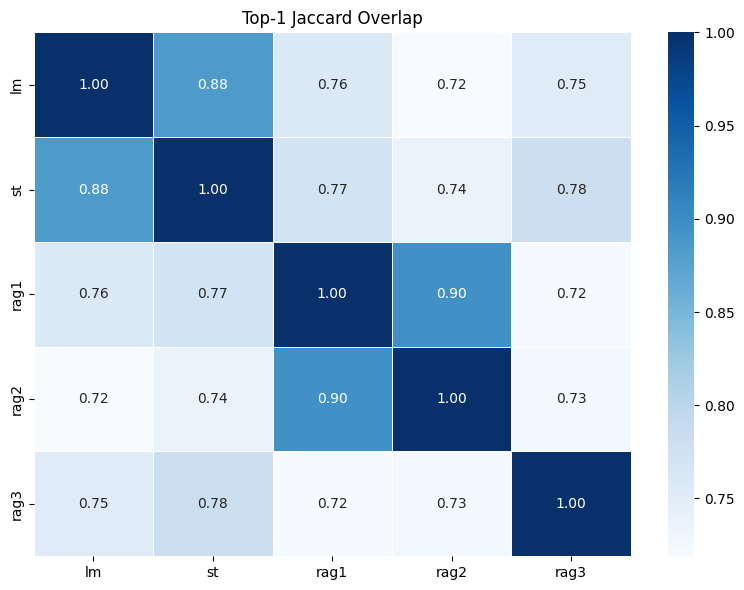

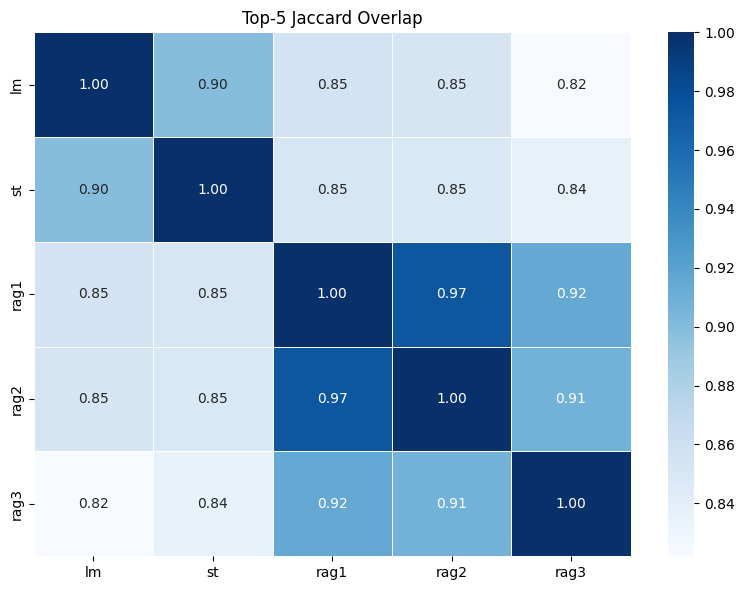

In [10]:
plot_heatmap(top1_overlap, "Top-1 Jaccard Overlap")
plot_heatmap(top5_overlap, "Top-5 Jaccard Overlap")